## Finpro Stage 1 - EDA - application train

# Group 3 <br>
**Byte Me** <br>
Hijir Della Wirasti <br>
Mauliddinia Iftikhar Agnany <br>
Jericho Medion Haryono <br>
Fakhri Dwi Nugroho <br>
Ryan Nofandi <br>
Johannes Sibarani <br>
Achmad Fichri Rachmadhani <br>
Muhammad Naufal <br>

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  2.0.1
pandas version :  2.2.2
seaborn version :  0.13.2


In [3]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

In [4]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [5]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Load Data

In [6]:
# Load the data from the CSV file
data = pd.read_csv('application_test.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
display(data.head())

First few rows of the dataset:


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married

# 1. Descriptive Statistics

In [7]:
# Display info about the dataset
print("\nInfo about the dataset:")
data.info()


Info about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB


In [8]:
print(data.dtypes)

SK_ID_CURR                        int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64
FLAG_CONT_MOBILE                  int64


In [9]:
# Display descriptive statistics
print("\nDescriptive statistics of the dataset:")
display(data.describe())


Descriptive statistics of the dataset:


,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,16432.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,28212.000000,48736.000000,40076.000000,24857.000000,21103.000000,25888.000000,16926.000000,15249.000000,23555.000000,25165.000000,25423.000000,16278.000000,20490.000000,15964.000000,25192.000000,15397.000000,22660.000000,24857.000000,21103.000000,25888.000000,16926.000000,15249.000000,23555.000000,25165.000000,25423.000000,16278.000000,20490.000000,15964.000000,25192.000000,15397.000000,22660.000000,24857.000000,21103.000000,25888.000000,16926.000000,15249.000000,23555.000000,25165.000000,25423.000000,16278.000000,20490.000000,15964.000000,25192.000000,15397.000000,22660.000000,26120.000000,48715.000000,48715.000000,48715.000000,48715.000000,48744.000000,48744.0,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.0,48744.000000,48744.0,48744.0,48744.0,48744.0,48744.0,48744.0,48744.000000,48744.0,48744.0,48744.0,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000
mean,277796.676350,0.397054,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,0.021226,-16068.084605,67485.366322,-4967.652716,-3051.712949,11.786027,0.999979,0.809720,0.204702,0.998400,0.263130,0.162646,2.146767,2.038159,2.012596,12.007365,0.018833,0.055166,0.042036,0.077466,0.224664,0.174216,0.501180,0.518021,0.500106,0.122388,0.090065,0.978828,0.751137,0.047624,0.085168,0.151777,0.233706,0.238423,0.067192,0.105885,0.112286,0.009231,0.029387,0.119078,0.088998,0.978292,0.758327,0.045223,0.080570,0.147161,0.229390,0.233854,0.065914,0.110874,0.110687,0.008358,0.028161,0.122809,0.089529,0.978822,0.754344,0.047420,0.084128,0.151200,0.233154,0.237846,0.068069,0.107063,0.113368,0.008979,0.029296,0.107129,1.447644,0.143652,1.435738,0.101139,-1077.766228,0.0,0.786620,

## Pendekatan Numerik

In [10]:
# pengelompokan kolom berdasarkan jenisnya
nums = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 
        'AMT_GOODS_PRICE', 'CNT_CHILDREN']


In [11]:
data[nums].describe()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,CNT_CHILDREN
count,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,48744.000000
mean,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,0.397054
std,1.015226e+05,3.653970e+05,16016.368315,3.367102e+05,0.709047
min,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,0.000000
25%,1.125000e+05,2.606400e+05,17973.000000,2.250000e+05,0.000000
50%,1.575000e+05,4.500000e+05,26199.000000,3.960000e+05,0.000000
75%,2.250000e+05,6.750000e+05,37390.500000,6.300000e+05,1.000000
max,4.410000e+06,2.245500e+06,180576.000000,2.245500e+06,20.000000


### A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai?

**Sebagian besar tipe datanya sudah sesuai isinya, namun masih ada beberapa data yang perlu diperbaiki atau disesuaikan, diantaranya:**
- DAYS_BIRTH
- DAYS_EMPLOYED
- DAYS_REGISTRATION
- DAYS_ID_PUBLISH
- DAYS_LAST_PHONE_CHANGE
</br></br>alasan dari saran terkait penyesuaian data: pada kolom tersebut, (days) mengindikasikan bahwa seharusnya data tersebut merupakan jumlah hari. Namun apabila dilihat, data yang ada masih terdapat yang berbentuk negatif atau minus (-)


- CNT_FAM_MEMBERS
- OBS_30_CNT_SOCIAL_CIRCLE
- DEF_30_CNT_SOCIAL_CIRCLE
- OBS_60_CNT_SOCIAL_CIRCLE
- DEF_60_CNT_SOCIAL_CIRCLE
- AMT_REQ_CREDIT_BUREAU_HOUR
- AMT_REQ_CREDIT_BUREAU_DAY
- AMT_REQ_CREDIT_BUREAU_WEEK
- AMT_REQ_CREDIT_BUREAU_MON
- AMT_REQ_CREDIT_BUREAU_QRT
- AMT_REQ_CREDIT_BUREAU_YEAR
</br></br>alasan dari saran terkait penyesuaian tipe data: pada kolom tersebut, tipedata berupa float64 tetapi jika dilihat datanya berupa integer. Sebaiknya tipe data disesuaikan dari float64 menjadi int64

### B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?

In [12]:
#Jumlah data yang null

data.isna().sum()

SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                        24
AMT_GOODS_PRICE                     0
NAME_TYPE_SUITE                   911
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                     32312
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE                          0
FLAG_EMAIL  

Data yang memiliki nilai kosong ada pada AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE, OWN_CAR_AGE, OCCUPATION_TYPE, EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3, APARTMENTS_AVG, BASEMENTAREA_AVG, YEARS_BEGINEXPLUATATION_AVG, YEARS_BUILD_AVG, COMMONAREA_AVG, ELEVATORS_AVG, ENTRANCES_AVG, FLOORSMAX_AVG, FLOORSMIN_AVG, LANDAREA_AVG, LIVINGAPARTMENTS_AVG, LIVINGAREA_AVG, NONLIVINGAPARTMENTS_AVG, NONLIVINGAREA_AVG, APARTMENTS_MODE, BASEMENTAREA_MODE, YEARS_BEGINEXPLUATATION_MODE, YEARS_BUILD_MODE, COMMONAREA_MODE, ELEVATORS_MODE, ENTRANCES_MODE, FLOORSMAX_MODE, FLOORSMIN_MODE, LANDAREA_MODE, LIVINGAPARTMENTS_MODE, LIVINGAREA_MODE, NONLIVINGAPARTMENTS_MODE, NONLIVINGAREA_MODE, APARTMENTS_MEDI,, BASEMENTAREA_MEDI, YEARS_BEGINEXPLUATATION_MEDI, YEARS_BUILD_MEDI, COMMONAREA_MEDI, ELEVATORS_MEDI, ENTRANCES_MEDI, FLOORSMAX_MEDI, FLOORSMIN_MEDI, LANDAREA_MEDI, LIVINGAPARTMENTS_MEDI, LIVINGAREA_MEDI, NONLIVINGAPARTMENTS_MEDI, NONLIVINGAREA_MEDI, FONDKAPREMONT_MODE, HOUSETYPE_MODE, TOTALAREA_MODE, WALLSMATERIAL_MODE, EMERGENCYSTATE_MODE, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE, AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR

### C. Apakah ada kolom yang memiliki nilai summary agak aneh?
(min/mean/median/max/unique/top/freq)

Berdasarkan summary statistik yang diberikan, berikut adalah beberapa observasi terkait nilai yang tampak aneh atau tidak umum:<br>

Kolom **CNT_CHILDREN**:<br>
Kolom ini memiliki nilai max sebesar 20. Hal ini mungkin tidak wajar, namun perlu divalidasi apakah ini merupakan kesalahan dalam input atau hanya sebuah outlier

Kolom **AMT_INCOME_TOTAL**:<br>
Kolom ini memiliki nilai max sebesar 4.410.000, dimana nilai ini jauh lebih besar daripada percentile 75 (225.000). Nilai ini dapat berupa error atau memang sebuah outlier, sehingga perlu divalidasi

Kolom **DAYS_BIRTH**, **DAYS_EMPLOYED**, **DAYS_REGISTRATION**, **DAYS_ID_PUBLISH**, **DAYS_LAST_PHONE_CHANGE**:<br>
Terdapat nilai yang positif dan negatif di kolom tersebut. Seharusnya, jika merujuk pada judul kolom, mengindikasikan bahwa kolom tersebut merupakan jumlah dari hari yang terhitung. sehingga sebaiknya nilai bernilai positif.<br>

**EXT_SOURCE_2**:<br>
Kolom ini memiliki nilai desimal yang sangat besar di data terendahnya (min), sebaiknya diperiksa ulang apakah memang desimal di nilai tersebut sangat kecil atau tidak dengan pertimbangan mean dan median nya hanya mempunyai 1 desimal, sedangkan min sampai 8 desimal.<br>

Kesimpulan:<br>
- **DAYS_BIRTH**, **DAYS_EMPLOYED**, **DAYS_REGISTRATION**, **DAYS_ID_PUBLISH**, **DAYS_LAST_PHONE_CHANGE** dengan nilai negatif sebaiknya diperiksa
- **EXT_SOURCE_2** dengan nilai minimum sangat rendah (8 desimal), sedangkan mean dan median nya hanya terdiri dari 1 desimal, perlu diperiksa<br>

Perlu ada investigasi lebih lanjut untuk melihat apakah nilai-nilai ini merupakan outlier atau kesalahan dalam data.

# Exploratory Data Analysis (EDA)

# 2. Univariate Analysis (20 Poin)

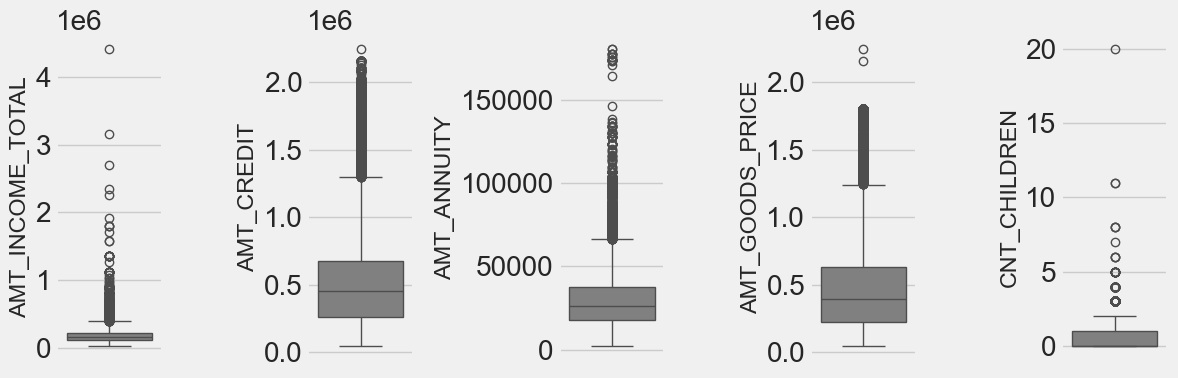

In [13]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=data[nums[i]], color='gray', orient='v')
    plt.tight_layout()

**AMT_INCOME_TOTAL**:  
Banyak data yang berada di luar batas maksimum. Bahkan, beberapa nilai pendapatan berada di sangat tinggi, yang bisa jadi outlier.  
*Follow-up*: Disarankan untuk memeriksa nilai-nilai pendapatan yang sangat tinggi untuk memastikan apakah ada kesalahan input data atau memang merupakan data valid.

**AMT_CREDIT**:  
Nilai kredit pada kolom ini juga tampak memiliki banyak data yang berada di luar batas maksimum, dengan beberapa nilai yang jauh lebih besar dari rata-rata.  
*Follow-up*: Sebaiknya ditinjau lebih lanjut apakah nilai kredit yang sangat tinggi ini wajar atau merupakan anomali.

**AMT_ANNUITY**:  
Visualisasi boxplot annuitas juga menunjukkan adanya data yang berada di luar batas maksimum, dengan beberapa outlier yang signifikan.  
*Follow-up*: Perlu dilakukan analisis lebih lanjut terhadap outlier ini, karena bisa jadi representasi dari pembayaran yang besar.

**AMT_GOODS_PRICE**:  
Distribusi harga barang juga menampilkan data yang melebihi batas maksimum, dengan beberapa harga barang yang sangat tinggi dibandingkan mayoritas data.  
*Follow-up*: Harga barang yang sangat tinggi ini perlu ditinjau apakah sesuai dengan data nyata atau merupakan outlier.

**CNT_CHILDREN**:  
Jumlah anak cenderung ada beberapa nilai yang menjadi outlier dan bahkan mungkin error.  
*Follow-up*: Jumlah yang sangat tinggi ini perlu divalidasi, apakah memang sebuah outlier atau error.

**Rekomendasi Pre-Processing:** <br>

Lakukan analisis lebih lanjut pada outlier yang terdeteksi, terutama untuk kolom AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOOD_PRICE, dan CNT_CHILDREN.<br>
Normalisasi atau scaling pada kolom numerik yang distribusinya skewed.<br>
Pertimbangkan untuk menggunakan transformasi seperti log-transform jika distribusi terlalu skewed, untuk menormalkan distribusi.<br>

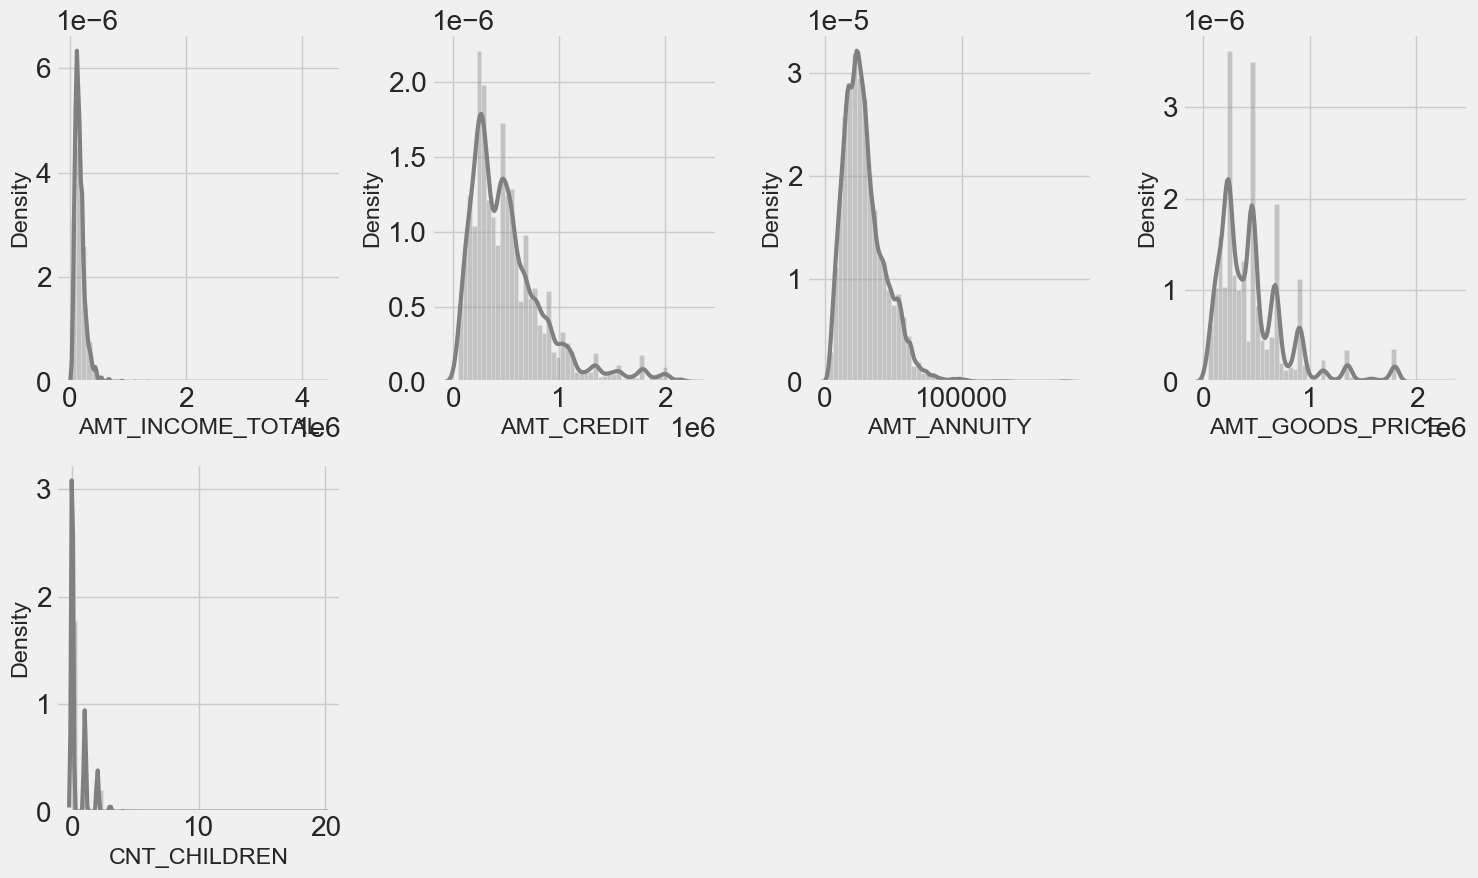

In [14]:
plt.figure(figsize=(15, 9))
for i in range(0, len(nums)):
    plt.subplot(2, 4, i+1)
    sns.distplot(data[nums[i]], color='gray')
    plt.tight_layout()

Berdasarkan visualisasi density plot dari gambar di atas, berikut adalah analisis distribusi masing-masing kolom:<br>

**AMT_INCOME_TOTAL**:  
Distribusinya sangat skewed ke kanan, dengan mayoritas nilai berada pada rentang rendah, namun ada beberapa outlier di bagian kanan.  
*Follow-up*: Disarankan untuk memeriksa nilai pendapatan yang sangat tinggi untuk memastikan apakah ada kesalahan input atau memang data yang valid.

**AMT_CREDIT**:  
Distribusi kredit menunjukkan skewness ke kanan, dengan sebagian besar nilai berada di rentang yang lebih rendah, sementara terdapat outlier di bagian kanan.  
*Follow-up*: Lakukan pemeriksaan lebih lanjut pada outlier kredit ini untuk memastikan apakah data tersebut benar.

**AMT_ANNUITY**:  
Distribusi skewed ke kanan dengan beberapa outlier yang signifikan. Sebagian besar data terletak di rentang nilai kecil, tetapi ada beberapa nilai yang sangat besar yang perlu diperhatikan.  
*Follow-up*: Outlier-outlier ini harus ditinjau lebih lanjut untuk memastikan apakah mereka valid atau ada kesalahan input.

**AMT_GOODS_PRICE**:  
Distribusi harga barang menunjukkan skewness ke kanan, dengan sebagian besar nilai di bawah 1 juta, sementara terdapat beberapa outlier yang mencapai hingga 4 juta.  
*Follow-up*: Nilai barang yang sangat tinggi ini perlu diperiksa lebih lanjut untuk memastikan keabsahannya.

**CNT_CHILDREN**:
Densitas maksimum dari data ini menampilkan jumlah yang signifikan di nilai 3, bahkan ada yang 0.5 yang bisa jadi merupakan error atau kesalahan input

Rekomendasi Pre-Processing:<br>
Lakukan transformasi log pada kolom NAMT_CREDIT, dan AMT_GOOD_PRICE untuk menangani skewed distribution.<br>
Outlier pada kolom CNT_CHILDREN,  AMT_GOOD_PRICE, dan AMT_ANNUITY perlu diverifikasi untuk memastikan apakah merupakan data valid atau kesalahan input.<br>

## Berdasarkan visualisasi density plot yang dihasilkan dari kode tersebut, berikut adalah analisis dari distribusi tiap kolom:




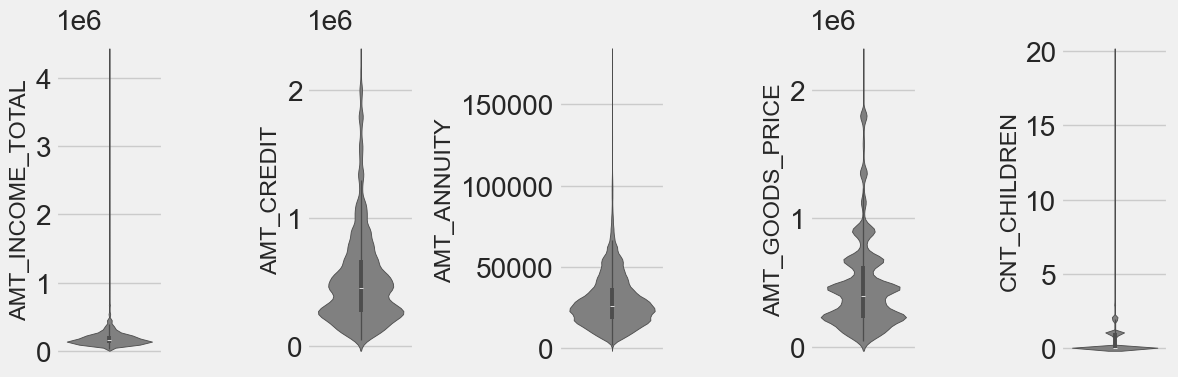

In [15]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.violinplot(y=data[nums[i]], color='gray', orient='v')
    plt.tight_layout()

Dari gambar violin plot di atas, berikut adalah analisis distribusi masing-masing kolom:<br>

**AMT_INCOME_TOTAL**:  
Distribusinya cenderung berkumpul di satu wilayah (<1 x 10^6), meskipun rentang data yang dimiliki sangat luat (>4 x 10^6).  
*Follow-up*: Disarankan untuk memeriksa nilai pendapatan yang sangat tinggi untuk memastikan apakah ada kesalahan input atau memang data yang valid.

**AMT_CREDIT**:  
Distribusi kredit menunjukkan skewness ke kanan, dengan sebagian besar nilai berada di rentang yang lebih rendah, sementara terdapat outlier di bagian kanan.  
*Follow-up*: Lakukan pemeriksaan lebih lanjut pada outlier kredit ini untuk memastikan apakah data tersebut benar.

**AMT_ANNUITY**:  
Distribusi skewed ke kanan dengan beberapa outlier yang signifikan. Sebagian besar data terletak di rentang nilai kecil, tetapi ada beberapa nilai yang sangat besar yang perlu diperhatikan.  
*Follow-up*: Outlier-outlier ini harus ditinjau lebih lanjut untuk memastikan apakah mereka valid atau ada kesalahan input.

**AMT_GOODS_PRICE**:  
Distribusi harga barang menunjukkan skewness ke kanan, dengan sebagian besar nilai di bawah 1 juta, sementara terdapat beberapa outlier yang mencapai hingga 4 juta.  
*Follow-up*: Nilai barang yang sangat tinggi ini perlu diperiksa lebih lanjut untuk memastikan keabsahannya.

**CNT_CHILDREN**:
Distribusinya cenderung berkumpul di satu wilayah (<5), meskipun rentang data yang dimiliki sangat luat (20).  
*Follow-up*: Disarankan untuk memeriksa jumlah anak yang sangat tinggi untuk memastikan apakah ada kesalahan input atau memang data yang valid.

Rekomendasi Pre-Processing:<br>
Lakukan transformasi log pada kolom NAMT_CREDIT, dan AMT_GOOD_PRICE untuk menangani skewed distribution.<br>
Outlier pada kolom CNT_CHILDREN,  AMT_GOOD_PRICE, dan AMT_ANNUITY perlu diverifikasi untuk memastikan apakah merupakan data valid atau kesalahan input.<br>

## Kesimpulan Univariate Analysis

Berdasarkan grafik-grafik yang telah dianalisis, berikut adalah beberapa kesimpulan utama:

1. **Distribusi Skewed dan Outlier**:  
   - Sebagian besar kolom dalam dataset menunjukkan distribusi yang skewed ke kanan, dengan nilai-nilai yang cenderung mendekati batas bawah (nol). Ini terlihat jelas pada kolom seperti **CNT_CHILDREN**, **AMT_GOODS_PRICE**, dan **AMT_INCOME_TOTAL**.
   - Outlier ditemukan di beberapa kolom, terutama pada nilai pembayaran dan kredit. Misalnya, kolom **AMT_GOODS_PRICE** dan **AMT_INCOME_TOTAL** memiliki beberapa nilai ekstrem yang bisa memengaruhi hasil analisis atau prediksi jika digunakan dalam machine learning.

2. **Karakteristik Temporal yang Cenderung Simetris dan Skewed**:  
   - Kolom **AMT_CREDIT** menunjukkan distribusi yang cenderung lebih simetris dan merata bila dibandingkan dengan kolom lainnya. Data tidak berkumpul di satu titik dan cukup tersebar di berbagai nilai dengan jumlah yang tidak sedikit.
   - Namun begitu, kolom **AMT_CREDIT** tetap menunjukkan distribusi yang skewed ke kanan.

**Rekomendasi Pre-Processing**:
- **Outlier Treatment**: Outlier yang ditemukan pada kolom **CNT_CHILDREN**, **AMT_TOTAL_INCOME**, dan **AMT_GOODS_PRICE** perlu ditangani. Teknik seperti clipping atau validasi data di sumbernya dapat digunakan untuk mengatasi nilai ekstrem ini.
- **Handling Skewness**: Kolom-kolom dengan distribusi skewed, seperti **AMT_CREDIT** dan **AMT_INCOME_TOTAL**, mungkin memerlukan transformasi data (misalnya, log-transform) atau scaling untuk mengurangi skewness dan menghasilkan distribusi yang lebih seimbang.
- **Analisis Outlier Lebih Lanjut**: Perlu dilakukan verifikasi pada outlier di kolom **CNT_CHILDREN**, karena data tersebut tidak realistis dan kemungkinan merupakan kesalahan input.

Kesimpulannya, dataset ini menunjukkan adanya distribusi skewed yang signifikan, beberapa outlier yang perlu diatasi, serta beberapa kolom yang menunjukkan karakteristik distribusi yang wajar, terutama untuk kolom yang berhubungan dengan identifikasi.

# 3. Multivariate Analysis (10 Poin)

In [16]:
data[nums].corr()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,CNT_CHILDREN
AMT_INCOME_TOTAL,1.000000,0.396572,0.457833,0.401995,0.038962
AMT_CREDIT,0.396572,1.000000,0.777733,0.988056,0.027840
AMT_ANNUITY,0.457833,0.777733,1.000000,0.787033,0.056770
AMT_GOODS_PRICE,0.401995,0.988056,0.787033,1.000000,0.025507
CNT_CHILDREN,0.038962,0.027840,0.056770,0.025507,1.000000


<Axes: >

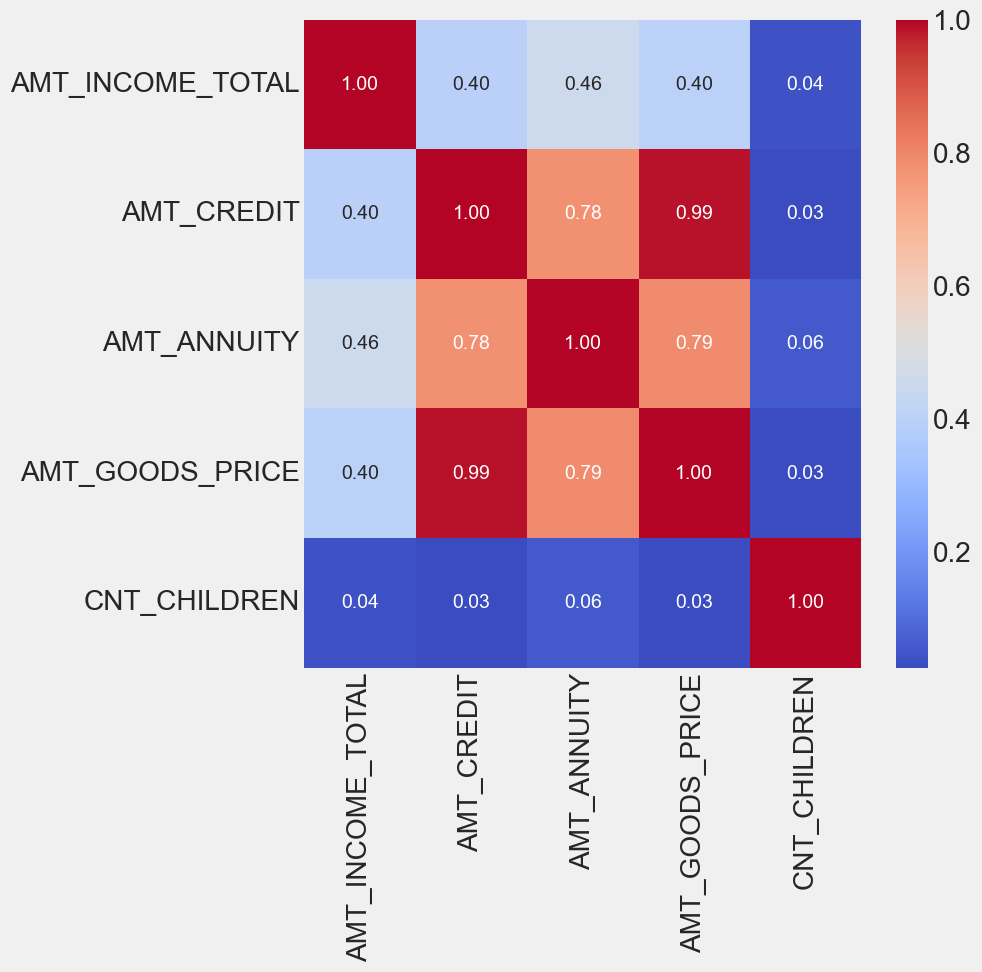

In [17]:
plt.figure(figsize=(8, 8))
sns.heatmap(data[nums].corr(), cmap='coolwarm', annot=True, fmt='.2f')


# 3A Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana saja yang paling relevan dan harus dipertahankan?
## Korelasi yang Signifikan:<br>
AMT_CREDIT vs. AMT_GOODS_PRICE (korelasi 0.99):<br>
Korelasi yang sangat tinggi menunjukkan bahwa kedua fitur ini memiliki hubungan yang kuat satu sama lain. Biasanya, nilai harga barang dan nilai kredit akan saling berkaitan. Kedua fitur ini sangat penting dan **harus dipertahankan**.<br>

AMT_CREDIT vs. AMT_ANNUITY (korelasi 0.78):<br>
Korelasi yang tinggi (0.78) menunjukkan bahwa kedua fitur ini memiliki hubungan yang kuat satu sama lain. Biasanya, nilai pinjaman juga akan berkaitan dengan besarnya nominal pembayaran setiap bulannya. Kedua fitur ini dapat dijadikan landasan analisa<br>

AMT_INCOME_TOTAL vs. AMT_ANNUITY (korelasi 0.46):<br>
Korelasi ini menunjukkan bahwa ada hubungan yang masih kuat meskipun tidak signifikan. Fitur ini tetap relevan yang penting dalam analisis pembayaran.<br>

## Fitur dengan Korelasi Rendah:<br>

CNT_CHILDREN vs. AMT_CREDIT/AMT_INCOME_TOTAL:<br>
Korelasi antara kedua ID ini dan fitur lainnya mendekati 0 (0.03), yang menunjukkan bahwa mereka tidak memiliki hubungan yang signifikan dengan fitur lain. Meskipun penting untuk identifikasi, fitur-fitur ini tidak relevan untuk analisis korelasi atau prediksi, sehingga dapat dipertimbangkan untuk tidak digunakan dalam pemodelan.<br>

## Kesimpulan:<br>
Fitur yang paling relevan dan harus **dipertahankan** untuk analisis lebih lanjut adalah:<br>
1. AMT_CREDIT vs. AMT_GOODS_PRICE (karena korelasinya yang sangat tinggi dan relevansi bisnis).<br>
2. AMT_INCOME_TOTAL vs. AMT_ANNUITY (karena korelasinya yang berkaitan dengan kemampuan seseorang dalam melakukan pembayaran)

Fitur yang dapat dipertimbangkan untuk **diabaikan** dalam analisis prediktif (tetapi mungkin penting untuk identifikasi unik):<br>
**CNT_CHILDREN** (karena korelasinya rendah dan hanya penting untuk keperluan identifikasi).<br>





# 3B Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu dilakukan terhadap feature itu?

Berdasarkan heatmap korelasi yang telah dianalisis, berikut adalah beberapa pola menarik antara fitur-fitur dalam dataset dan langkah-langkah yang bisa diambil terkait fitur-fitur tersebut.

## Pola yang Menarik di Korelasi Antar-Feature:

**AMT_CREDIT dan AMT_GOODS_PRICE (korelasi 0.99)**:  
- **Polanya**: Korelasi ini sangat kuat, menunjukkan bahwa semakin tinggi harga barang yang dibiayai, semakin tinggi pula jumlah kredit yang diberikan. Pola ini cukup jelas, karena nilai kredit biasanya terkait langsung dengan harga barang yang dibeli.
- **Tindakan**: Meskipun korelasi sangat tinggi, keduanya tetap penting dan **perlu dipertahankan**. Harga barang dan nilai kredit memiliki relevansi bisnis yang berbeda, sehingga keduanya bisa memberikan nilai tambah dalam analisis atau prediksi.

**AMT_CREDIT dan AMT_ANNUITY (korelasi 0.78)**:  
- **Polanya**: Hubungan antara nilai kredit dan jumlah annuitas menunjukkan bahwa semakin besar kredit, semakin besar pula cicilan annuitas yang harus dibayar. Pola ini penting untuk memahami beban keuangan nasabah.
- **Tindakan**: Karena keduanya berperan penting dalam analisis keuangan, **keduanya harus dipertahankan** dalam analisis dan model prediksi.

**AMT_ANNUITY dan AMT_GOODS_PRICE (korelasi 0.79)**:  
- **Polanya**: Korelasi yang tinggi antara annuitas dan harga barang menunjukkan bahwa cicilan annuitas sangat dipengaruhi oleh harga barang yang dibeli, yang juga berkaitan dengan besarnya kredit.
- **Tindakan**: Seperti fitur sebelumnya, **kedua fitur ini harus dipertahankan** karena relevansi bisnisnya yang jelas.

**AMT_INCOME_TOTAL vs. AMT_ANNUITY (korelasi 0.42)**:  
- **Polanya**: Korelasi yang cukup tiggi di 0.42 menunjukkan keterkaitan nasabah dengan pendapatan terhadap kemampuan cicilannya. semakin tinggi pendapatan, maka cicilan akan semakain meningkat pula.
- **Tindakan**: Kedua fitur ini **perlu dipertahankan** karena memberikan informasi penting terkait demografi dan riwayat pekerjaan nasabah.

**CNT_CHILDREN dan fitur lainnya (korelasi mendekati 0)**:  
- **Polanya**: Korelasi rendah menunjukkan bahwa **CNT_CHILDREN** tidak memiliki korelasi spesifik terhadap fitur lainnya.
- **Tindakan**: Fitur ini tidak relevan untuk analisis korelasi.

## Kesimpulan Tindakan untuk Antar-Feature:

**Pertahankan**:
- **AMT_CREDIT** dan **AMT_GOODS_PRICE** karena meskipun korelasinya sangat tinggi, keduanya berhubungan erat dengan konteks bisnis dan perlu dipertahankan.
- **AMT_CREDIT** dan **AMT_ANNUITY** karena keduanya memberikan wawasan yang berbeda dalam analisis keuangan.
- **AMT_INCOME_TOTAL** dan **AMT_ANNUITY** karena keduanya penting untuk memahami profil nasabah dan riwayat pendapatan.

**Pertimbangkan untuk diabaikan dalam pemodelan prediktif**:
- **CNT_CHILDREN**, karena tidak memberikan kontribusi prediktif.

## Langkah Selanjutnya:

- **Multikolinearitas**: Saat membuat model prediksi, pastikan tidak ada fitur yang sangat berkorelasi yang bisa menyebabkan multikolinearitas. Meskipun fitur seperti **AMT_CREDIT** dan **AMT_GOODS_PRICE** memiliki korelasi yang tinggi, pastikan untuk mempertimbangkan relevansi bisnisnya sebelum menghapus salah satu.
- **Feature Engineering**: Buat fitur baru berdasarkan kombinasi fitur, seperti menghitung selisih antara **AMT_CREDIT** dan **AMT_GOODS_PRICE**, untuk memahami apakah kredit yang diberikan melebihi atau sesuai dengan harga barang.

# 4. Business Insight

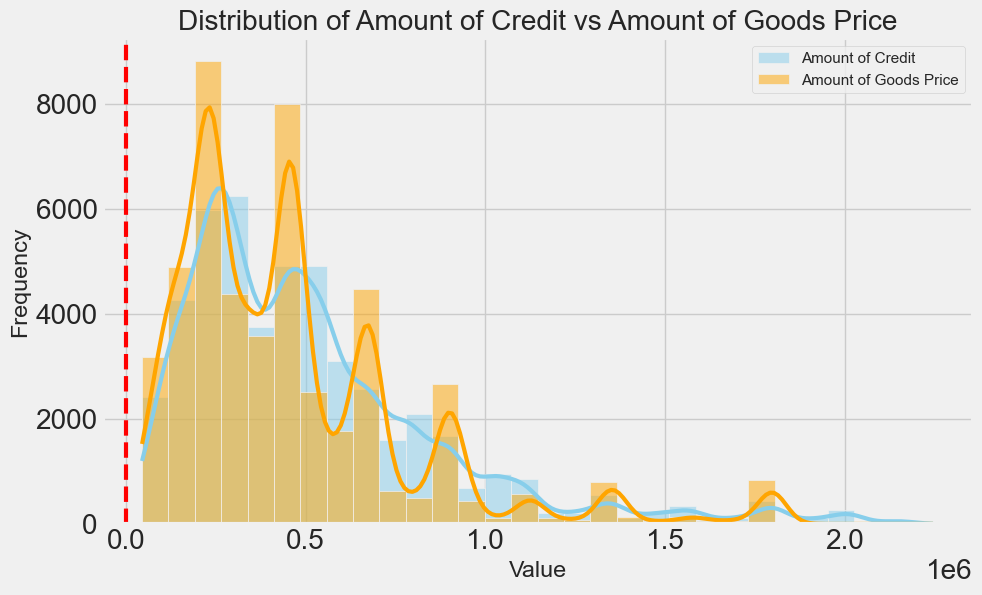

In [20]:
# 1. Distribution of Amount of Credit vs Amount of Goods Price
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='AMT_CREDIT', bins=30, color='skyblue', label='Amount of Credit', kde=True)
sns.histplot(data=data, x='AMT_GOODS_PRICE', bins=30, color='orange', label='Amount of Goods Price', kde=True)
plt.axvline(0, color='red', linestyle='--')
plt.title('Distribution of Amount of Credit vs Amount of Goods Price')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()



### Business Insight Berdasarkan Gambar Distribusi `Amount of Credit` vs `Amount of Goods Price`<br>

1. **Pola Pembelian di harga barang:**<br>

   - Dari grafik di atas, terlihat bahwa mayoritas distribusi `Amount of Goods Price` (grafik oranye) dan `Amount of Goods Price` (grafik biru) berada di rentang nominal yang kecil (<1.000.000). Hal ini menunjukkan bahwa orang cenderung membeli lebih banyak barang di rentang harga yang lebih rendah.<br>

2. **Keterkaitan harga barang terhadap nominal kredit yang diambil:**<br>

   - Pada distribusi `Amount of Credits`, dapat dilihat bahwa orang cenderung mengambil kredit lebih banyak bila dibandingkan harga barangnya terutama di rentang 500.000 hingga 1.000.000. Hal ini dapat menunjukkan bahwa meskipun pembelian lebih banyak di barang berharga rendah, tapi kredit yang didapatkan lebih besar daripada harga barangnya. Selain itu, kecenderungan barang yang diajukan kreditnya adalah barang yang memiliki harga tidak terlalu rendah tapi tidak terlalu tinggi<br>

   - Namun, hanya sedikit kredit yang di ajukan di rentang harga >1.000.000, yang berarti hanya segelintir nasabah yang melakukan pembelian di harga tersebut. Hal ini bisa mengindikasikan bahwa memang orang yang membeli harga di rentang tersebut adalah golongan menengah keatas, sehingga dalam pembelian keatas tidak perlu menggunakan kredit.<br>


3. **Business Insight**:<br>

   - **Menggencarkan promosi untuk barang dengan harga sedang:**<br>

     - Mengingat sebagian besar nasabah cenderung melakukan pembelian barang dengan metode kredit untuk barang berbiaya sedang (antara 500.000 dan 1.000.000), maka penetrasi pasar di rentang harga tersebut dapat dimaksimalkan. Hal ini dapat dilakukan dengan cara promosi maupun kemudahan pembiayaan dengan nominal cicilan yang lebih ringan.<br>

   
   - **Intensifkan pendekatan untuk barang dengan harga rendah:**<br>

     - Meskipun segmen ini tidak semasif barang dengan harga sedang, namun jumlah pembelian yang signifikan mampu memberikan ceruk yang baru untuk melakukan penetrasi pasar. Pendekatan dan promosi terkait program cicilan untuk barang berharga rendah (seperti produk sehari-hari, makanan, layanan transportasi harian) dapat menjadi awal yang bagus untuk meningkatkan cicilan di rentang harga tersebut.<br>

Dengan memahami pola distribusi ini, perusahaan dapat merancang strategi komunikasi dan program loyalitas yang lebih efektif untuk meningkatkan keterlibatan dan retensi nasabah.

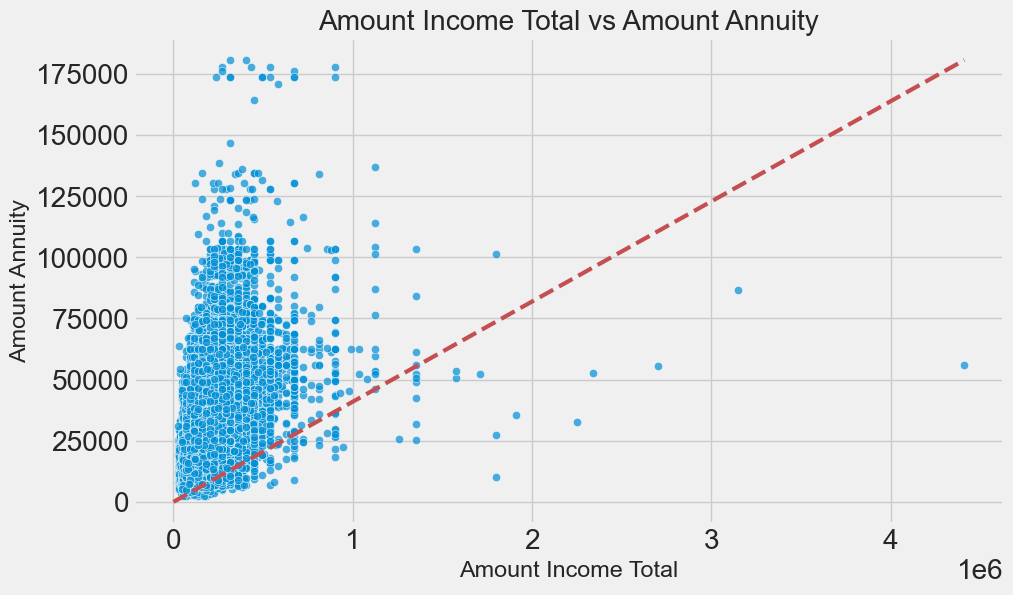

In [25]:
# 2. Scatter plot of Amount of Credit vs Amount of Annuity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='AMT_INCOME_TOTAL', y='AMT_ANNUITY', palette='viridis', alpha=0.7)
plt.title('Amount Income Total vs Amount Annuity')
plt.xlabel('Amount Income Total')
plt.ylabel('Amount Annuity')
plt.plot([0, data['AMT_INCOME_TOTAL'].max()], [0, data['AMT_ANNUITY'].max()], 'r--')  # Diagonal reference line
plt.show()

### Business Insight Berdasarkan Grafik `Amount Income Total vs Amount Annuity`

1. **Hubungan Positif yang Moderat antara Amount Income Total dan Amount Annuity**:
   - Grafik scatter plot menunjukkan bahwa terdapat hubungan positif yang moderat antara `Amount Income Total` (jumlah pendaatan) dan `Amount Annuity` (jumlah pinjaman yang dibayarkan).
   - Sebagian besar titik data berada di rentang pendapatan <1.000.000, yang menunjukkan bahwa mayoritas yang mengambil cicilan adalah pembeli dengan pendapatan <1.000.000.
   - Ini mengindikasikan bahwa nasabah yang melakukan cicilan umumnya adalah nasabah golongan menengah kebawah.

2. **Pengambil cicilan untuk orang berpendapatan tinggi**:
   - Meskipun mayoritas cicilan diambil oleh orang dengan pendapatan <1.000.000, bukan berarti orang dengan pendapatan >1.000.000 tidak mengambil cicilan.
   - Ada beberapa nasabah yang berpendapatan sedang mengambil cicilan. Bahkan ada nasabah dengan pendapatan >4.000.000 yang mengambil cicilan bulanan yang setara atau bahkan lebih rendah dari nasabah yang berpendapatan <1.000.000
   - Nilai ini perlu divalidasi, mengingat dapat dianggap sebagai outlier atau bahkan kesalahan inpun

3. **Cluster pada Pembayaran dengan Nilai Cicilan Rendah**:
   - Terlihat beberapa cluster yang padat di dekat sumbu y (Amount Annuity), terutama ketika `Amount Income Total` bernilai <500.000.
   - Ini dapat menunjukkan adanya nasabah yang memiliki cicilan dengan nominal sedang bahkan tinggi, namun pendapatannya rendah. Nasabah tersebut patut diwaspadai karena dengan pendapatan rendah namun jumlah cicilan yang tinggi, berpotensi untuk melakukan gagal bayar.

### Rekomendasi Bisnis:
1. **Identifikasi dan Validasi Nasabah dengan Pedapatan Tinggi**:
   - Lakukan identifikasi dan validasi atau verifikasi terhadap nasasbah berpendapatan tinggi. Mengingat nasabah tersebut dapat dibilang outlier, karena mengambil cicilan yang jauh di bawah pendapatannya

2. **Segmentasi Nasabah Berdasarkan Pendapatan**:
   - Segmen nasabah berdasarkan pendapatan. Hal ini dapat menjadi acuan ketika akan memberikan pinjaman kepada nasabah
   - Nasabah yang memiliki pendapatan menengah rendah cenderung melakukan pinjaman lebih banyak dibandingkan nasabah yang memiliki pendapatan lebih tinggi

3. **Mewaspadai Nasabah Berdasarkan Pendapatan**:
   - Pertimbangkan untuk memberikan nasabah nominal cicilan yang terlalu tinggi untuk nasabah dengan pendapatan rendah. Hal ini untuk mengantisipasi terjadinya gagal bayar, sekaligus supaya kegiatan yang dilakukan dapat berjalan dengan baik.

Dengan menggunakan insight ini, perusahaan dapat mengoptimalkan strategi kredit dan pembayaran nasabah serta menjaga kualitas portofolio kredit yang sehat.

### Kesimpulan dari Ketiga Business Insight <br>

Berdasarkan analisis dari kedua visualisasi, berikut adalah kesimpulan utama dan rekomendasi strategis yang dapat diambil:<br>

1. **Analisis Pembiayaan Cicilan Berdasarkan Harga Barang Yang Dibeli**:<br>
   - **Insight**: Mayoritas nasabah cenderung melakukan cicilan untuk barang berharga menengah kebawah. Kecenderungan segmen harga barang ini dimiliki oleh barang konsumtif, dengan segmen pasar untuk orang yang bersifat konsimtif<br>
   - **Rekomendasi**: Buat program loyalitas atau tawarkan insentif seperti pengurangan suku bunga bagi nasabah yang konsisten melakukan pembayaran lebih awal. Ini dapat mendorong nasabah untuk terus melakukan pinjaman dan pengajuan kredit. Semakin banyak atau tinggi kredit yang diajukan, maka akan semakin banyak pendapatan yang dihasilkan.<br>

2. **Korelasi Antara Jumlah Pendapatan Terhadap Cicilan Bulanan Yang Diambil**:
   - **Insight**: Terdapat korelasi moderat antara jumlah pendapatan terhadap cicilan bulanan yang diambil. Pengambil cicilan adalah masyarakat yang memiliki pendapatan <1.000.000. Hal ini menjadi hal yang baik mengingat segmen ini dihuni oleh masyarakat konsumtif. Namun patut diperhatikan bahwa dengan banyaknya masyarakat berpendapatan <1.000.000 yang mengambil cicilan, terutama dengan cicilan bulanan yang tinggi untuk menghindari bunga yang tinggi, akan meningkatkan risiko terjadinya gagal bayar<br>
   - **Rekomendasi**: Memberikan program cicilan dengan biaya rendah untuk masyarakat di segmen pendapatan <1.000.000. Program cicilan ini akan berdampak positif bagi kedua belah pihak. Pihak penyedia cicilan akan diuntungkan karena semakin rendah cicilan menandakan semakin tinggi bunga yang didapat. Sedangkan pengambil cicilan akan diuntungkan karena semakin rendah cicilan, maka akan semakin kecil kemungkinan terjadinya gagal bayar dan semakin ringannya beban yang ditanggung setiap bulannya.
